# Basics of logistic regressison 

## Imprt the relevant libraties 

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
raw_data = pd.read_csv('Addmittance.csv', delimiter='\t')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [8]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No': 0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


## Variables

In [10]:
y = data['Admitted']
x1 = data['SAT']

## Plot the data 

### Scatter Plot

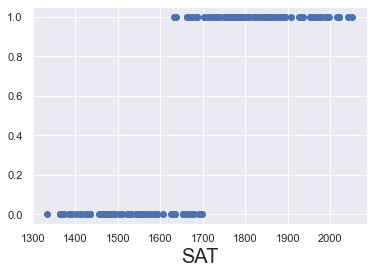

In [11]:
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT',fontsize=20)
plt.show()b

### Plot with a regression line

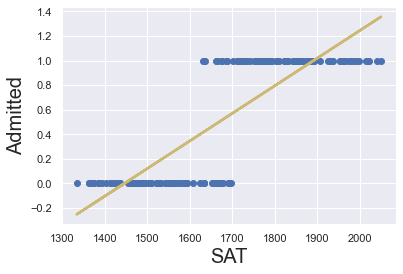

In [14]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
result_lin = reg_lin.fit()

plt.scatter(x1,y,color = 'C0')
y_hat = x1*result_lin.params[1]+result_lin.params[0]

plt.plot(x1,y_hat, lw=2.5, color='C8')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

## Plot with a logistic regresison curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


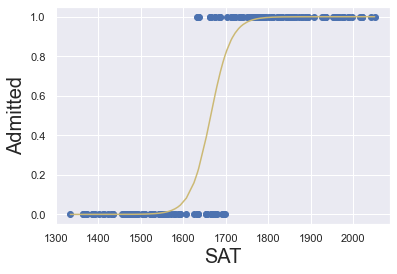

In [18]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted, f_sorted, color='C8')
plt.show()